In [7]:
import gluonbook as gb
from mxnet import gluon,nd,autograd,init
from mxnet.gluon import data as gdata,nn,loss as gloss

In [8]:
n_train=100
n_test=100
true_w=nd.array([1.2,-3.4,5.6])
true_b=5
features=nd.random.normal(shape=(n_train+n_test,1))
poly_features=nd.concat(features,nd.power(features,2),nd.power(features,3))
labels=nd.dot(poly_features,true_w)+true_b
labels+=nd.random.normal(scale=0.1,shape=(labels.shape))

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def plot(x,y1,y2):
    plt.plot(x[:40],y1[:40],label='train')
    plt.plot(x[:40],y2[:40],'--',label='test')
    plt.legend()

In [10]:
loss=gloss.L2Loss()
num_epoches=100
def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net=nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=0.01))
    batch_size=10
    train_iter=gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)
    trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.01})
    train_ls,test_ls=[],[]
    for epoch in range(num_epoches):
        for X,y in train_iter:
            with autograd.record():
                l=loss(net(X),y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),test_labels).mean().asscalar())
    print('last epoch: train loss %f test loss %f'%(train_ls[-1],test_ls[-1]))
    print('weight:',net[0].weight.data(),'\n','bias:',net[0].bias.data())
    plot(list(range(1,num_epoches+1)),train_ls,test_ls)
        
        
    

last epoch: train loss 0.007993 test loss 0.006163
weight: 
[[ 1.2796962 -3.3591063  5.5751843]]
<NDArray 1x3 @cpu(0)> 
 bias: 
[4.960248]
<NDArray 1 @cpu(0)>


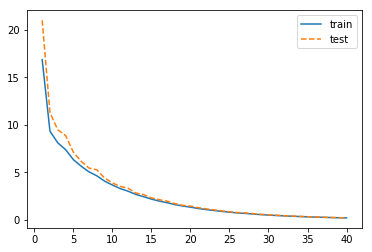

In [11]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[n_train:])


last epoch: train loss 58.348221 test loss 31.808941
weight: 
[[15.375694]]
<NDArray 1x1 @cpu(0)> 
 bias: 
[3.269389]
<NDArray 1 @cpu(0)>


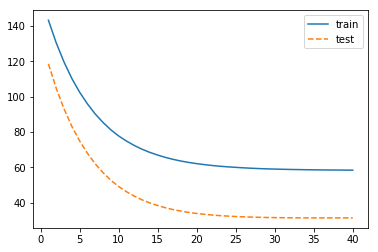

In [12]:
fit_and_plot(poly_features[:n_train,0],poly_features[n_train:,0],labels[:n_train],labels[n_train:])

last epoch: train loss 10.110624 test loss 86.656532
weight: 
[[0.8507039 1.0570445 1.238703 ]]
<NDArray 1x3 @cpu(0)> 
 bias: 
[1.1918287]
<NDArray 1 @cpu(0)>


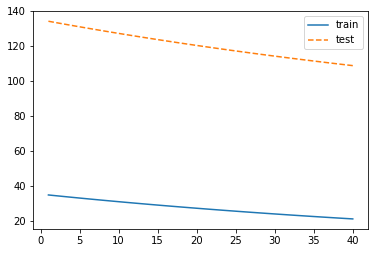

In [13]:
fit_and_plot(poly_features[:2,:],poly_features[n_train:,:],labels[:2],labels[n_train:])